## Importar librerias para leer correctamente los datos del archivo Json

____________________________________________________________________________________________________________________________________________________________________


In [1]:
import ast
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings

# Lee el archivo json y crea un dataframe
rows = []
with open('steam_games.json', 'r') as f:
    for line in f.readlines():
        rows.append(ast.literal_eval(line))

df = pd.DataFrame(rows)

In [2]:
# Suprimir todos los warnings
warnings.filterwarnings("ignore")

# Define una funcion de conteo
Mediante un conteo muestra la cantidad de nulls
___________________________________________________________________________________________________

In [3]:

def frequency_counter(df, lista):
    aux_list = []
    for i in lista:
        aux_list.append((i, round((len(df.loc[df[i] == 1])), 2)))
    aux_list = dict(aux_list)
    counter_aux_list = Counter(aux_list)
    return counter_aux_list
df

,publisher,genres,app_name,title,url,release_date,tags,discount_price,reviews_url,specs,price,early_access,id,developer,sentiment,metascore
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",4.49,http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,False,761140,Kotoshiro,NaN,NaN
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",NaN,http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,643980,Secret Level SRL,Mostly Positive,NaN
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",NaN,http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,670290,Poolians.com,Mostly Positive,NaN
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",0.83,http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,False,767400,彼岸领域,NaN,NaN
4,NaN,NaN,Log Challenge,NaN,http://store.steampowered.com/app/773570/Log_C...,NaN,"[Action, Indie, Casual, Sports]",1.79,http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,False,773570,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32130,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",1.49,http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS""",NaN,NaN
32131,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",4.24,http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada,NaN,NaN
32132,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",1.39,http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich,NaN,NaN
32133,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",NaN,http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns",1 user reviews,NaN


In [4]:

df.isna().sum()

publisher          8052
genres             3283
app_name              2
title              2050
url                   0
release_date       2067
tags                163
discount_price    31910
reviews_url           2
specs               670
price              1377
early_access          0
id                    2
developer          3299
sentiment          7182
metascore         29458
dtype: int64

## Limpieza de datos internos del dataset 

Se realizara una limpieza u/o trasformacion de datos a cada columna de ser necesario

___________________________________________________________________________________________________

Elimina las columnas que no seran necesarias para el analisis

In [5]:
df.drop(columns=['publisher', 'app_name', 'title', 'url', 'discount_price', 'reviews_url', 'early_access', 'id', 'developer', 'sentiment', 'metascore'], inplace=True)

Elimina valores en la columna tags que no correspondan a algun valor presente en la columna genres

In [6]:
a_list = []
key_list = []
tags_list = []
for i in df['genres']:
    if type(i) != float:
        for x in i:
            a_list.append(x)
counter_dic = Counter(a_list)
for key in counter_dic:
    key_list.append(key)
for idx, z in enumerate(df['tags']):
    if type(z) != float:
        for m in z:
            if m in key_list:
                tags_list.append(m)
        df.at[idx, 'tags'] = tags_list
        tags_list = []


(1)  Reemplaza los valores nulos en "genres" con los valores de tags 

(2)  Convierte la columna 'genres' de listas a cadenas de texto
 
(3)  Elimina las columnas 'tags' y 'genres' que ya no son necesarias
 
(4)  Define una función para convertir listas de strings a un solo string separado por comas

In [7]:
#(1)
df["genres"].fillna(df["tags"], inplace=True)

#(2)
df["genres_str"] = df["genres"].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

#(3)
df.drop(["tags", "genres"], axis="columns", inplace=True)

#(4)
def convert_list_to_str(x):
    if isinstance(x, list):
        elements_as_str = [str(item) for item in x]
        return ', '.join(elements_as_str)
    elif isinstance(x, str):
        try:
            list_value = eval(x)
            if isinstance(list_value, list):
                elements_as_str = [str(item) for item in list_value]
                return ', '.join(elements_as_str)
        except (NameError, SyntaxError):
            pass
        return x
    return str(x)

Aplica la función a la columna 'genres_str' para convertir listas y listas dentro de cadenas a cadenas de texto

In [8]:

df['genres_str'] = df['genres_str'].apply(convert_list_to_str)

Aplica one-hot encoding a la columna 'genres_str'

In [9]:
genres_dummies = df['genres_str'].str.get_dummies(', ')
df = pd.concat([df, genres_dummies], axis=1)

# Elimina la columna original 'genres_str'
df.drop(columns=['genres_str'], inplace=True)

Genera un diccionario donde se muestra la frecuencia de aparicion de cada genero en todo el dataset

In [10]:
aux_list = []
aux_banned = ['Free to Play', 'Early Access']
for i in key_list:
    if i not in aux_banned:
        aux_list.append((i, round((len(df.loc[df[i] == 1])), 2)))
aux_list = dict(aux_list)
counter_aux_list = Counter(aux_list)
counter_aux_list

Counter({'Indie': 17138,
         'Action': 12433,
         'Casual': 9159,
         'Adventure': 8856,
         'Simulation': 7381,
         'Strategy': 7164,
         'RPG': 5610,
         'Sports': 1548,
         'Racing': 1191,
         'Massively Multiplayer': 1147,
         'Design &amp; Illustration': 460,
         'Utilities': 425,
         'Web Publishing': 273,
         'Education': 192,
         'Animation &amp; Modeling': 183,
         'Video Production': 151,
         'Software Training': 118,
         'Audio Production': 110,
         'Photo Editing': 79,
         'Accounting': 7})

# Elimina valores NaN y los generos menos frecuentes

In [11]:

df.drop(columns=['nan', 'specs', 'Free to Play', 'Design &amp; Illustration', 'Utilities', 'Web Publishing', 'Education', 'Animation &amp; Modeling', 'Video Production', 'Software Training', 'Audio Production', 'Photo Editing', 'Accounting'], inplace=True)

Crea una lista en donde se eliminen valores faltantes o con formato extraño de release_date

In [12]:

filter_abc = ['.', 'nan', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']

values_list = []
for i in df['release_date'].unique():
    if type(i) != float:
        for x in i:
            if x in filter_abc and i not in values_list:
                values_list.append(i)            

for idx, i in enumerate(df['release_date']):
    if type(i) == float or i in values_list or len(i) != 10:
        df.drop(idx, inplace=True)
#Crea columnas separadas para año y mes de lanzamiento
df['release_date'] = pd.to_datetime(df['release_date'])
df['Year'] = df['release_date'].dt.year
df['Month'] = df['release_date'].dt.month
df = df[['Year', 'Month', 'Action', 'Adventure', 'Casual', 'Early Access', 'Indie', 'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy', 'price']]

In [13]:
# Reinicia el indice del dataframe
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)

Elimina valores de la columna price que no sean numericos

In [14]:
for idx, i in enumerate(df['price']):
    if type(i) != float:
        df.drop(idx, inplace=True)

In [15]:
# Elimina valores nulos de la columna price
df['price'] = df['price'].astype(float)
df.dropna(inplace=True)

Convierte las columnas a tipo int32

In [16]:
genres_list = ['Action', 'Adventure', 'Casual', 'Early Access', 'Indie', 'Massively Multiplayer', 'RPG', 'Racing', 'Simulation', 'Sports', 'Strategy']
for i in genres_list:
    df[i] = df[i].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27211 entries, 0 to 29782
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   27211 non-null  int32  
 1   Month                  27211 non-null  int32  
 2   Action                 27211 non-null  int32  
 3   Adventure              27211 non-null  int32  
 4   Casual                 27211 non-null  int32  
 5   Early Access           27211 non-null  int32  
 6   Indie                  27211 non-null  int32  
 7   Massively Multiplayer  27211 non-null  int32  
 8   RPG                    27211 non-null  int32  
 9   Racing                 27211 non-null  int32  
 10  Simulation             27211 non-null  int32  
 11  Sports                 27211 non-null  int32  
 12  Strategy               27211 non-null  int32  
 13  price                  27211 non-null  float64
dtypes: float64(1), int32(13)
memory usage: 1.8 MB


## Visualización de datos

# Gráfico de dispersión 
(Relación entre año y precio)

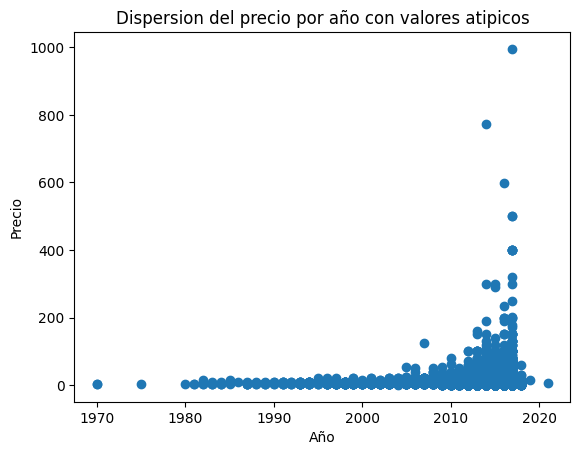

In [17]:
plt.scatter(df['Year'], df['price'])
plt.xlabel('Año')
plt.ylabel('Precio')
plt.title('Dispersion del precio por año con valores atipicos')
plt.show()

In [18]:
# Calcula el primer y tercer cuartil de price
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calcula el rango intercuartílico (IQR)
IQR = Q3 - Q1

# Define los límites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Elimina filas con outliers en price
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25452 entries, 0 to 29782
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   25452 non-null  int32  
 1   Month                  25452 non-null  int32  
 2   Action                 25452 non-null  int32  
 3   Adventure              25452 non-null  int32  
 4   Casual                 25452 non-null  int32  
 5   Early Access           25452 non-null  int32  
 6   Indie                  25452 non-null  int32  
 7   Massively Multiplayer  25452 non-null  int32  
 8   RPG                    25452 non-null  int32  
 9   Racing                 25452 non-null  int32  
 10  Simulation             25452 non-null  int32  
 11  Sports                 25452 non-null  int32  
 12  Strategy               25452 non-null  int32  
 13  price                  25452 non-null  float64
dtypes: float64(1), int32(13)
memory usage: 1.7 MB


Crea y ordena el DataFrame por los valores de frecuencia en orden descendente

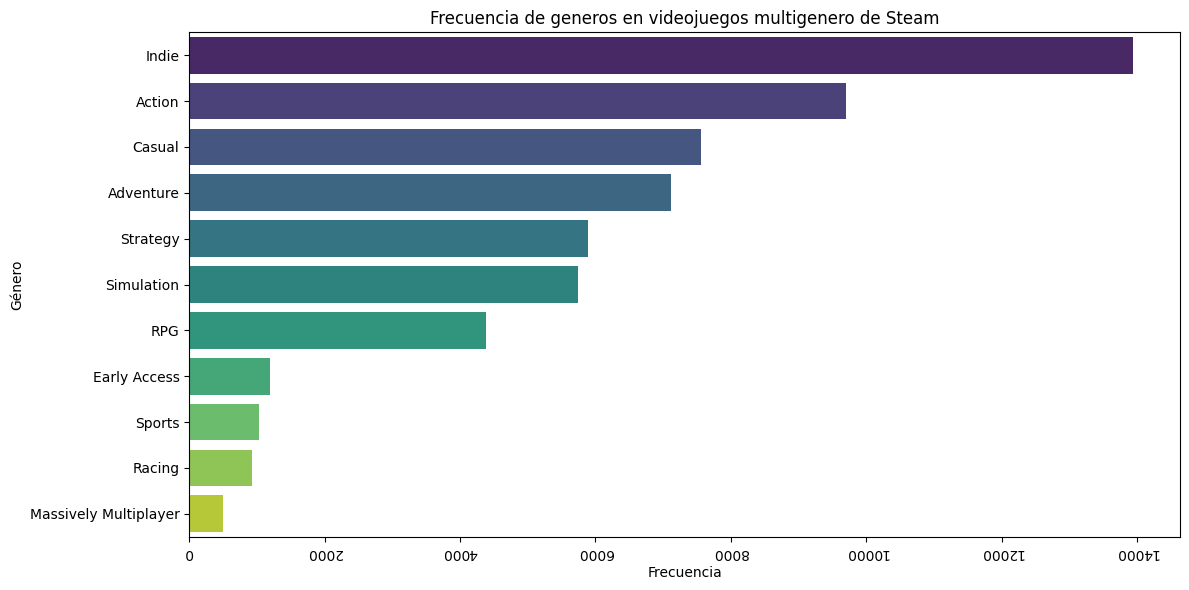

In [20]:

counter_aux_list_2 = frequency_counter(df, genres_list)
datos = counter_aux_list_2
datos = pd.DataFrame.from_dict(datos, orient='index', columns=['Frecuencia'])
datos = datos.sort_values(by='Frecuencia', ascending=False)
# Crea el gráfico de barras usando Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Frecuencia', y=datos.index, data=datos, palette='viridis')

# Rota las etiquetas del eje x para que sean legibles
plt.xticks(rotation=180)

# Etiquetas y título
plt.xlabel('Frecuencia')
plt.ylabel('Género')
plt.title('Frecuencia de generos en videojuegos multigenero de Steam')

# Muestra el gráfico
plt.tight_layout()
plt.show()

Genera estadisticas descriptivas para la columna 

In [21]:
df['Year'].describe()

count    25452.000000
mean      2014.666234
std          3.658874
min       1970.000000
25%       2014.000000
50%       2016.000000
75%       2017.000000
max       2021.000000
Name: Year, dtype: float64

In [22]:
#Promedio
df['Year'].mode()

0    2017
Name: Year, dtype: int32

# Histograma de distribución
(cantidad de juegos por año)

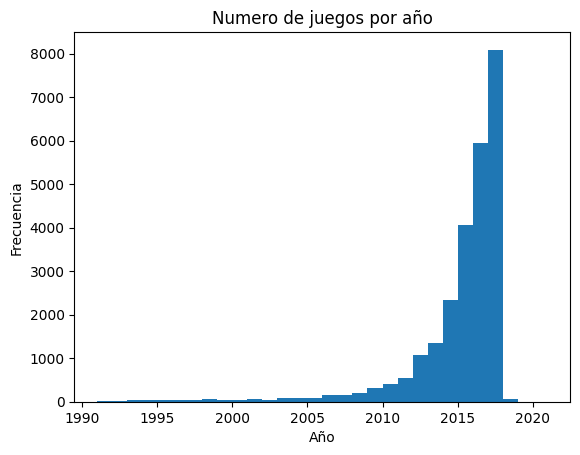

In [23]:

plt.hist(df.loc[df['Year'] > 1990]['Year'], bins=30)
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.title('Numero de juegos por año')
plt.show()

In [24]:
# Genera estadisticas descriptivas para la columna month
df['Month'].describe()

count    25452.000000
mean         7.004558
std          3.400404
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: Month, dtype: float64

In [25]:
#Promedio
df['Month'].mode()

0    10
Name: Month, dtype: int32

# Histograma de distribución 
(cantidad de juegos por año)

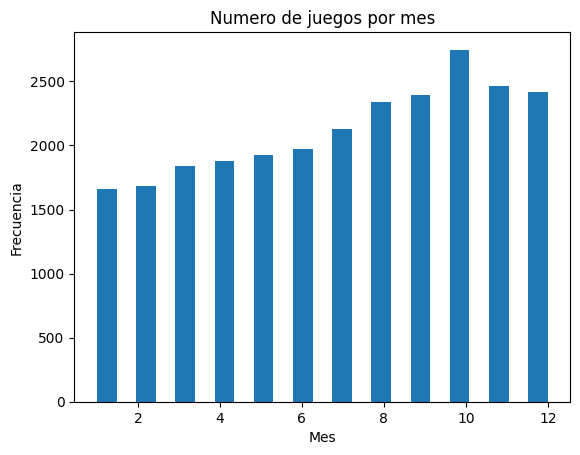

In [26]:

plt.hist(df['Month'], bins=23)
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.title('Numero de juegos por mes')
plt.show()

# Histogramas de distribución
(precios)

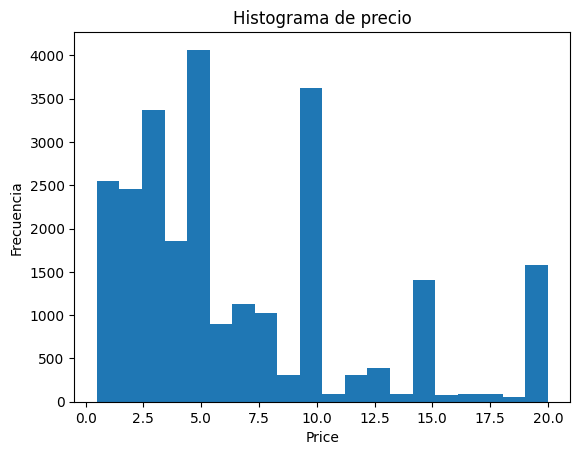

In [27]:
plt.hist(df['price'], bins=20)
plt.xlabel('Price')
plt.ylabel('Frecuencia')
plt.title('Histograma de precio')
plt.show()

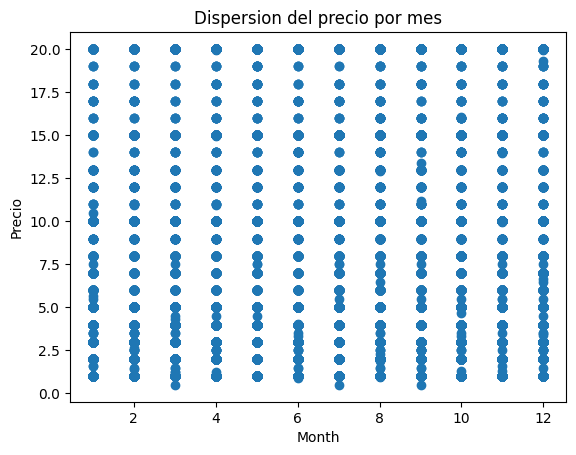

In [28]:
#Gráfico de dispersión para ver la relación entre dos variables numéricas
plt.scatter(df['Month'], df['price'])
plt.xlabel('Month')
plt.ylabel('Precio')
plt.title('Dispersion del precio por mes')
plt.show()

## Relaciones entre variables

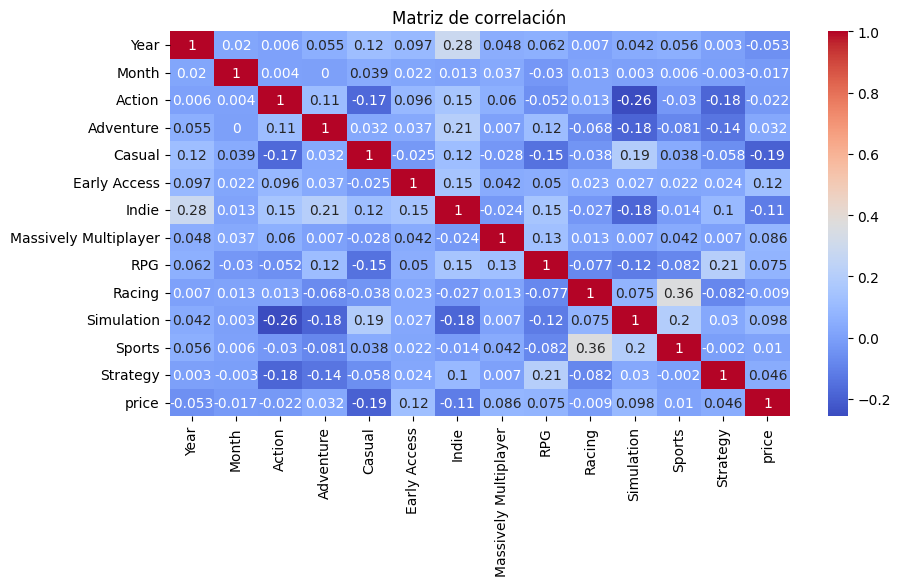

In [29]:
#Matriz de correlación
correlation_matrix = df.corr()
correlation_matrix = correlation_matrix.round(3)
plt.figure(figsize=(10, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

## Modelo de predicción usando regresion lineal

In [30]:
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

Definir las características u/o variables features y targuet

In [31]:
# Genera las variables predictoras y la variable objetivo del modelo
X = df.drop(columns=['price'])
y = df['price']

# Divide los datos en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
X

,Year,Month,Action,Adventure,Casual,Early Access,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
0,2018,1,1,0,1,0,1,0,0,0,1,0,1
3,2017,12,1,1,1,0,0,0,0,0,0,0,0
4,2018,1,1,1,0,0,0,0,0,0,1,0,0
5,2018,1,0,0,0,0,1,0,0,0,1,1,0
6,2018,1,0,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29778,2018,1,1,1,1,0,1,0,0,0,0,0,0
29779,2018,1,0,0,1,0,1,0,0,0,1,0,1
29780,2018,1,0,0,1,0,1,0,0,0,0,0,1
29781,2018,1,0,0,0,0,1,0,0,1,1,0,0


In [33]:
base_model = XGBRegressor(objective='reg:squarederror', random_state=42)

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.1, 0.2],
    'subsample': [0.8, 1.0]
}

grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=2)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.6s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.4s
[CV] END 

In [34]:
# Calcula el RMSE del modelo
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {round(rmse,2)}')

Root Mean Squared Error: 4.68


In [35]:
import pickle

# Guardar el modelo en un archivo utilizando pickle
with open('modelo_xgboost.pkl', 'wb') as file:
    pickle.dump(best_model, file)


Para poder ejecutar el modelo de prediccion en la API, es necesario ejecutar este codigo en la pestaña de codigo.py pero al hacerlo me genera un error que no pude solucionar y por tema de tiempo no alcance pero el modelo sirve aqui en la pestaña del EDA

In [ ]:
#import pickle

#with open('modelo_xgboost.pkl', 'rb') as file:
    #loaded_model = pickle.load(file)
